<a href="https://colab.research.google.com/github/JonathanJMH/MLOpsEquipo19/blob/main/MLOps_Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Operaciones de aprendizaje automatico (Grupo 10)**

**Equipo 19:**
  - Emmanuel Gallegos
  - José Esteban Jiménez
  - Carlos Ledezma
  - A01795195 | Jonathan Marmolejo
  - Salvador Mendoza
  - Emil Palomino

# **Declaración general de librerias**

In [8]:
!pip install category_encoders
!pip install dython

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from dython.nominal import associations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# **1. Manipulación y preparación de datos**

**1a . Importar los conjuntos de datos con los que se trabajará.**

In [10]:
# Se importa la fuente de datos a trabajar.

#from google.colab import drive
#drive.mount('/content/drive')

#import os
#DIR = "/content/drive/My Drive/MLOps/"
#os.chdir(DIR)

ObesityDataSet = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv",sep=',',header='infer')

**Descripción del Dataset ObesityDataSet:**
Este conjunto de datos incluye información para la estimación de niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos de alimentación y condición física.Los datos contienen **17 atributos y 2,111 registros.**
Los registros están etiquetados con la variable de **clase NObesity** (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de *Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I. , Obesidad Tipo II y Obesidad Tipo III*. El 77% de los datos se generaron de forma sintética utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recogieron directamente de los usuarios a través de una plataforma web.

**1b. Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.**

In [11]:
# Identificamos las variables que componen el dataset y sus caracteristicas.
ObesityDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
# Confirmamos que no tenga valores nulos.
ValNulos = ObesityDataSet.isnull().sum()
print(ValNulos)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**NOTA:** Este dataset no contiene valores nulos.

**1c. Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.**

In [13]:
# Clasificación de variables por tipo.

#numericas
numericas=ObesityDataSet.select_dtypes(include=['float64','int64'])
colnumericas=ObesityDataSet.select_dtypes(include=['float64','int64']).columns
#categoricas
categoricas=ObesityDataSet.select_dtypes(include=['object'])
colcategoricas=ObesityDataSet.select_dtypes(include=['object']).columns

categoricas.head().T
numericas.head().T

,0,1,2,3,4
Age,21.00,21.00,23.0,27.0,22.00
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.00,56.00,77.0,87.0,89.80
FCVC,2.00,3.00,2.0,3.0,2.00
NCP,3.00,3.00,3.0,3.0,1.00
CH2O,2.00,3.00,2.0,2.0,2.00
FAF,0.00,3.00,2.0,2.0,0.00
TUE,1.00,0.00,1.0,0.0,0.00


In [14]:
# Identificación de valores en variables categoricas
for i in colcategoricas:
  print(i)
  print(ObesityDataSet[i].unique())

# Gender:                            Genero                                               | categorico.
# family_history_with_overweight:    Historial de familiares con sobrepeso                | Binario.
# FAVC:		                           ¿Consume alimentos ricos en calorías con frecuencia? |	Binario.
# CAEC:                              ¿Comes algún alimento entre comidas?		              |	Binario.
# SMOKE:	                           ¿Fumas?                                              |	Binario.
# SCC:	                             ¿Controlas las calorías que comes diariamente?       |	Binario.
# CALC:	                             ¿Cada cuando consumes alohol?                        | categorico.
# MTRANS:	                           ¿Qué trasporte utilizas habitualmente?		            | categorico.
# NObeyesdad:                        Nivel de obecidad                                    | categorico.

Gender
['Female' 'Male']
family_history_with_overweight
['yes' 'no']
FAVC
['no' 'yes']
CAEC
['Sometimes' 'Frequently' 'Always' 'no']
SMOKE
['no' 'yes']
SCC
['no' 'yes']
CALC
['no' 'Sometimes' 'Frequently' 'Always']
MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [15]:
print(colnumericas)

#Para las variables numericas se estandarizará el valor según su definición

# Age:      Edad                                                       | continuo
# Height:   Estatura                                                   | continuo
# Weight:   Peso                                                       | continuo
# FCVC:     ¿Sueles comer vegetales en tus alimentos?	                 | entero
# NCP:      ¿Cuántas comidas principales haces al día?                 | entero
# CH2O:     ¿Cuanta agua tomas al día?                                 | entero
# FAF:      ¿Qué tan frecuente haces actividad física?                 | entero
# TUE:      ¿Que tan frecuente utilizas dispositivos electronicos?     | entero

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [16]:
# Identificación de valores en variables numericas
for i in colnumericas:
  print(i)
  print(ObesityDataSet[i].unique())

Age
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
FCVC
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.886157 2.967853 2.61983

In [17]:
# Se harán algunos ajustes en los valores para su mejor manejo

# Age:      Edad                                                       | continuo  | entero
# Height:   Estatura                                                   | continuo  | entero y dos digitos decimales
# Weight:   Peso                                                       | continuo  | entero y dos digitos decimales
# FCVC:     ¿Sueles comer vegetales en tus alimentos?	                 | entero    | entero                              | veces al día
# NCP:      ¿Cuántas comidas principales haces al día?                 | entero    | entero                              | veces al día
# CH2O:     ¿Cuanta agua tomas al día?                                 | entero    | entero y un digito decimal
# FAF:      ¿Qué tan frecuente haces actividad física?                 | entero    | entero                              | veces por semana
# TUE:      ¿Que tan frecuente utilizas dispositivos electronicos?     | entero    | entero                              | veces al día

# Se redondea a un entero y dos digitos
ObesityDataSet['Height']=ObesityDataSet['Height'].round(2)

# Se redondea el valor para posteriormente hacerlo entero
ObesityDataSet['Weight']=ObesityDataSet['Weight'].round()
ObesityDataSet['CH2O']=ObesityDataSet['CH2O'].round()
ObesityDataSet['Weight']=ObesityDataSet['Weight'].astype(int)
ObesityDataSet['CH2O']=ObesityDataSet['CH2O'].astype(int)

# Se convierte a valor entero
ObesityDataSet['Age']=ObesityDataSet['Age'].astype(int)
ObesityDataSet['FCVC']=ObesityDataSet['FCVC'].astype(int)
ObesityDataSet['NCP']=ObesityDataSet['NCP'].astype(int)
ObesityDataSet['FAF']=ObesityDataSet['FAF'].astype(int)
ObesityDataSet['TUE']=ObesityDataSet['TUE'].astype(int)

In [18]:
# Se comprueban resultados
print(ObesityDataSet['Height'].unique())

[1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94]


In [19]:
# Identificación de valores en variables numericas
for i in colnumericas:
  print(i)
  print(ObesityDataSet[i].unique())

Age
[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 50 43 46 47]
Height
[1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94]
Weight
[ 64  56  77  87  90  53  55  68 105  80  99  60  66 102  78  82  70  50
  65  52  76  83  62  49  48  67  88  75  72  54  44  58  57  69  95 112
  85  45  91  86  93  84  42  63  51  61 109  94  59 130  79  96  98  74
 118  40  71 100  73 114 121 120  47  81 115 107 110 173  97 125  92 108
  39 113  89 104 127 111 138 165 133 134  43  41  46 101 106 103 119 117
 122 116 129 124 126 123 128 150 132 152 131 142 153 136 139 156 137 141
 144 149 155 161 151 140 135 154 143 147]
FCVC
[2 3 1]
NCP
[3 1 4 2]
CH2O
[2 3 1]
FAF
[0 3 2 1]
TUE
[1 0 2]


In [20]:
# Validación de dataset a trabajar:
ObesityDataSet.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight


**Se realiza una revisión de los valores de variables numericas obteniendo el siguiente detalle:**

FCVC:¿Sueles comer vegetales en tus alimentos?

1: Never | 2: Sometimes | 3:Always

NCP: ¿Cuántas comidas principales haces al día?

1: Between 1 y 2 | 2: Three | 3: More than three

CH2O:¿Cuanta agua tomas al día?

1: Less than a liter | 2: Between 1 and 2 L | 3: More than 2 L

FAF: ¿Qué tan frecuente haces actividad física?

0: I do not have | 1: 1 or 2 days | 2: 2 or 4 days | 3: 4 or 5 days

TUE: ¿Que tan frecuente utilizas dispositivos electronicos?

0: 0–2 hours | 1: 3–5 hours  2: | More than 5 hours

In [21]:
# Con base en el detalle anterior, se realiza el ajuste de estas variables como variables categoricas

ObesityDataSet['FCVC']=ObesityDataSet['FCVC'].astype(str)
ObesityDataSet['NCP']=ObesityDataSet['NCP'].astype(str)
ObesityDataSet['FAF']=ObesityDataSet['FAF'].astype(str)
ObesityDataSet['TUE']=ObesityDataSet['TUE'].astype(str)
ObesityDataSet['CH2O']=ObesityDataSet['CH2O'].astype(str)

In [22]:
# Validación de dataset a trabajar:
ObesityDataSet.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight


In [23]:
# Validación de dataset a trabajar:
ObesityDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   object 
 7   NCP                             2111 non-null   object 
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   object 
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [24]:
# Nueva clasificación de variables por tipo.

#numericas
numericas=ObesityDataSet.select_dtypes(include=['float64','int64'])
colnumericas=ObesityDataSet.select_dtypes(include=['float64','int64']).columns
#categoricas
categoricas=ObesityDataSet.select_dtypes(include=['object'])
colcategoricas=ObesityDataSet.select_dtypes(include=['object']).columns

categoricas.head().T
numericas.head().T

,0,1,2,3,4
Age,21.00,21.00,23.0,27.0,22.00
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.00,56.00,77.0,87.0,90.00


#**Análisis de datos exploratorio**

In [25]:
#1. Tamaño del dataset
print("Número de entradas: ",ObesityDataSet.shape[0], '\nNúmero de atributos: ', ObesityDataSet.shape[1])

Número de entradas:  2111 
Número de atributos:  17


In [26]:
#2. Separación de variables en numéricas y categóricas
ObesityDataSet_num = ObesityDataSet.select_dtypes(include=['float64','int64'])

ObesityDataSet_cat = ObesityDataSet.select_dtypes(include=['object'])

##**Análisis de variables numéricas**

In [27]:
#3. Análisis descriptivo de variables numéricas
numericas.describe()

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701620,86.586452
std,6.308664,0.093368,26.190136
min,14.000000,1.450000,39.000000
25%,19.000000,1.630000,65.500000
50%,22.000000,1.700000,83.000000
75%,26.000000,1.770000,107.000000
max,61.000000,1.980000,173.000000


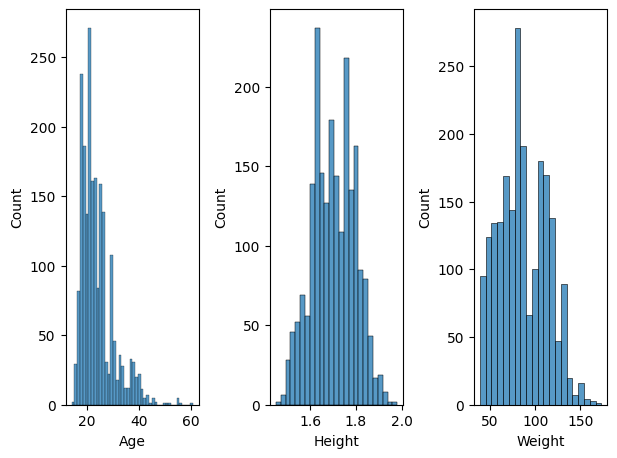

In [28]:
# Histogramas para variables numéricas
figure, ax = plt.subplots(1, 3)
figure.tight_layout(pad=2.0)

sub = [0, 1, 2]
cols = numericas.select_dtypes([np.int64,np.float64]).columns

for i in range(len(cols)):
    sns.histplot(numericas[cols[i]], ax=ax[sub[i]])

In [29]:
# Medidas de asimetría y curtósis, clasificación de variables según estas medidas.
cols = numericas.columns
kur_skw = pd.DataFrame()

for i in cols:
  kur = kurtosis(numericas[i], axis=0, bias=True)
  if kur > 0:
    clas1 = 'Leptocúrtica'
  elif kur == 0:
    clas1 = 'Mesocúrtica'
  else:
    clas1 = 'Platicúrtica'
  skw = skew(numericas[i], axis=0, bias=True)
  if skw >= -0.5 and skw <= 0.5:
    clas2 = 'Simétrica'
  elif skw < -0.5:
    clas2 = 'Sesgo negativo'
  else:
    clas2 = 'Sesgo positivo'
  new_row = pd.DataFrame([[i,skw,kur,clas2 +' y '+clas1]], columns=['Variable','Asimetría','Curtósis','Clasificación'])
  kur_skw = pd.concat([new_row, kur_skw],ignore_index=True)

kur_skw

,Variable,Asimetría,Curtósis,Clasificación
0,Weight,0.255671,-0.701061,Simétrica y Platicúrtica
1,Height,-0.009109,-0.566589,Simétrica y Platicúrtica
2,Age,1.561224,2.978707,Sesgo positivo y Leptocúrtica


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


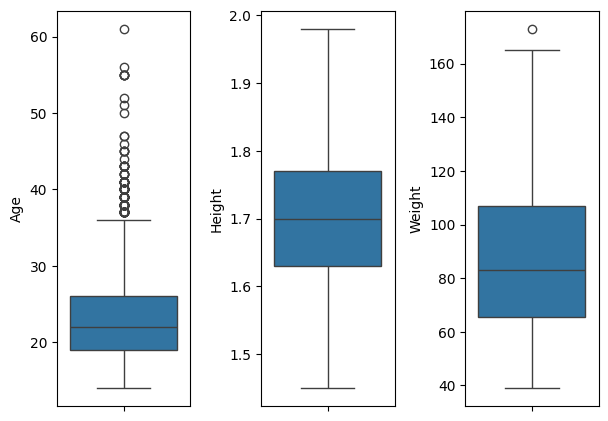

In [30]:
#Identificación de valores atípicos
figure, ax = plt.subplots(1, 3)
figure.tight_layout(pad=2.0)

sub = [0, 1, 2]
cols = numericas.select_dtypes([np.int64,np.float64]).columns

for i in range(len(cols)):
    sns.boxplot(numericas[cols[i]], ax=ax[sub[i]])

<Axes: >

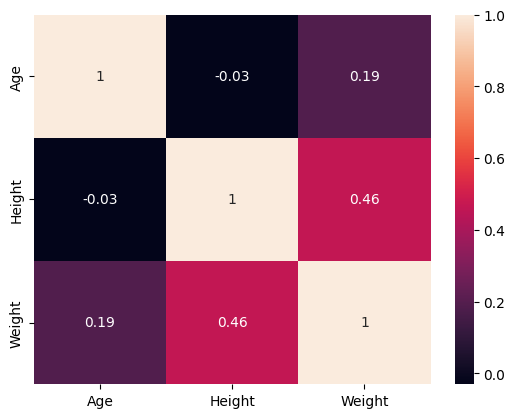

In [31]:
#Análisis de correlación
sns.heatmap(numericas.corr(), annot=True)

##**Análisis de variables categóricas**

In [32]:
#1. Análisis descriptivo de variables categóricas
categoricas.describe(include="all")

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,3,4,4,2,3,2,4,3,4,5,7
top,Male,yes,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1257,1362,1765,2067,1110,2015,1011,1415,1401,1580,351


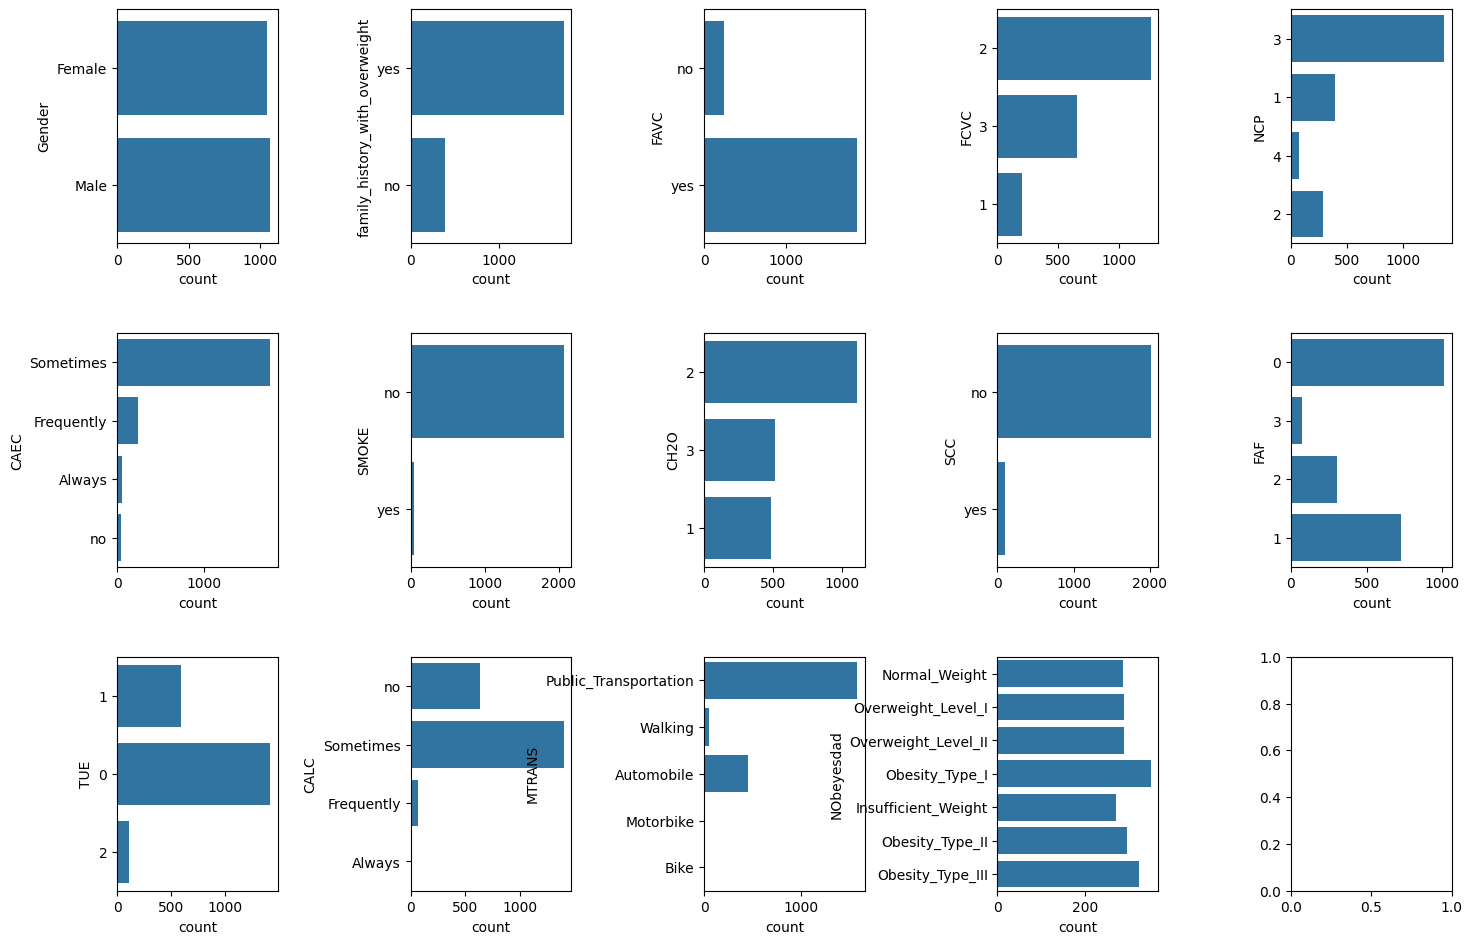

In [33]:
# Gráficos de barra para variables categóricas
figure, ax = plt.subplots(3, 5)
figure.tight_layout(pad=1.0)
figure.set_size_inches(15, 10)

sub = [[0,0], [0,1], [0,2], [0,3],[0,4], [1,0], [1,1], [1,2], [1,3], [1,4], [2,0], [2,1], [2,2], [2,3], [2,4]]
cols = categoricas.select_dtypes([object]).columns

for i in range(len(cols)):
    sns.countplot(categoricas[cols[i]], ax=ax[sub[i][0], sub[i][1]])

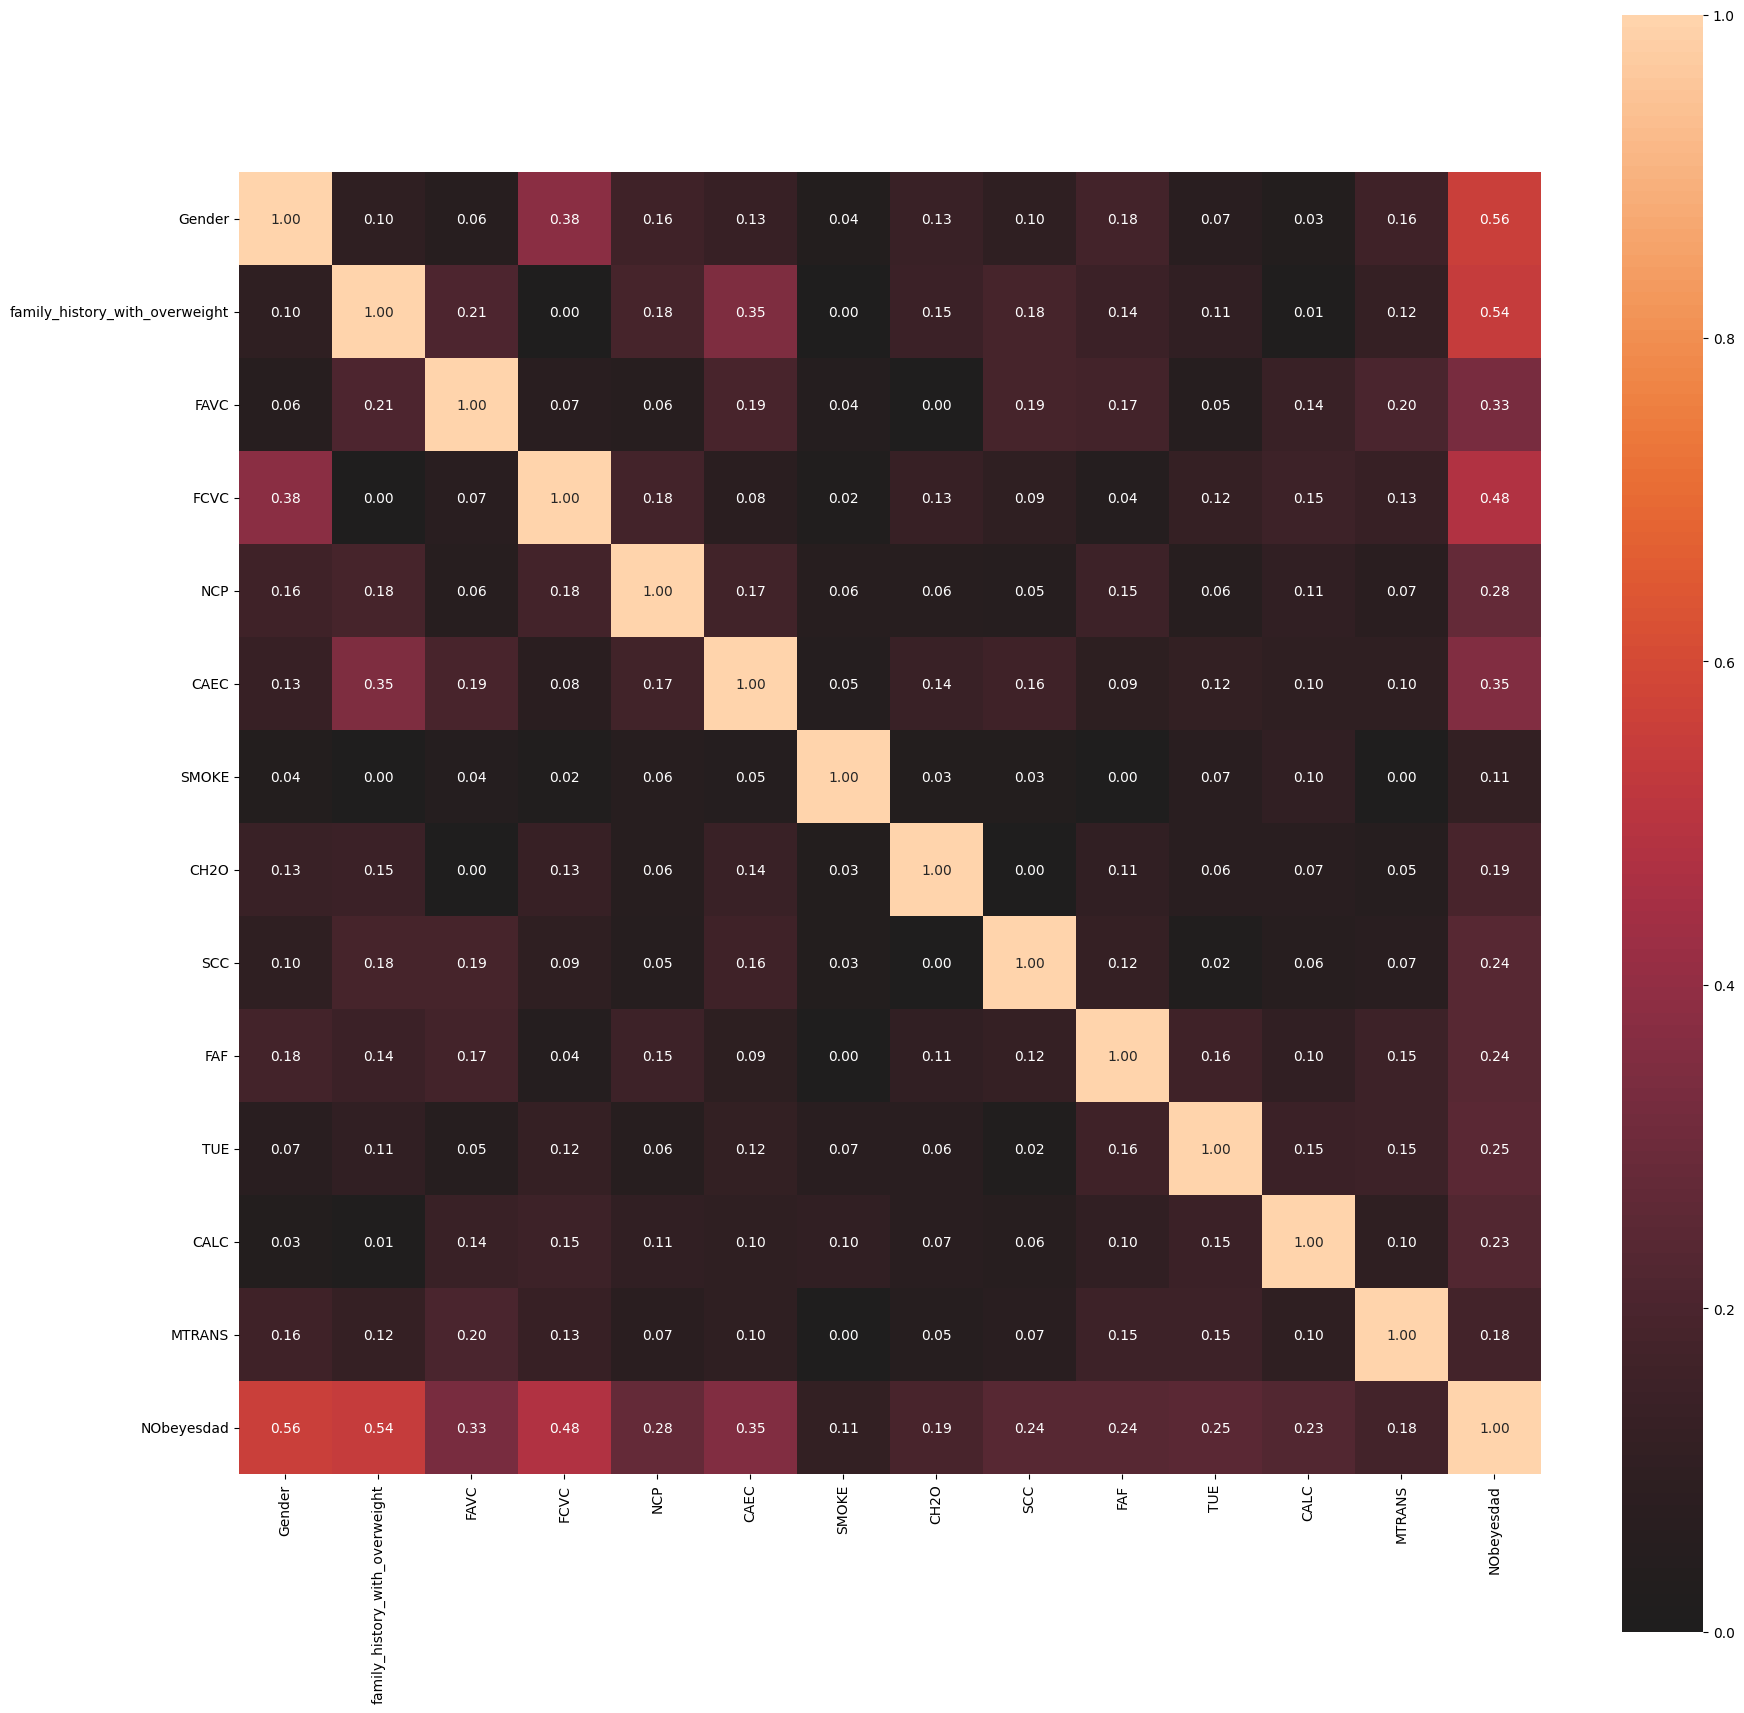

Matriz de Correlación (V de Cramer):
{'corr':                                   Gender  family_history_with_overweight  \
Gender                          1.000000                        0.098942   
family_history_with_overweight  0.098942                        1.000000   
FAVC                            0.059618                        0.205016   
FCVC                            0.379316                        0.000000   
NCP                             0.159897                        0.184971   
CAEC                            0.130774                        0.349246   
SMOKE                           0.035201                        0.000000   
CH2O                            0.134041                        0.146811   
SCC                             0.097993                        0.181217   
FAF                             0.177296                        0.140689   
TUE                             0.069878                        0.106380   
CALC                            0.033173  

In [34]:
#Análisis de correlación categórica utilizando V de Cramer
corr_matrix = associations(categoricas, plot=True)

# Mostrar la matriz de correlación
print("Matriz de Correlación (V de Cramer):")
print(corr_matrix)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='NObeyesdad', ylabel='count'>

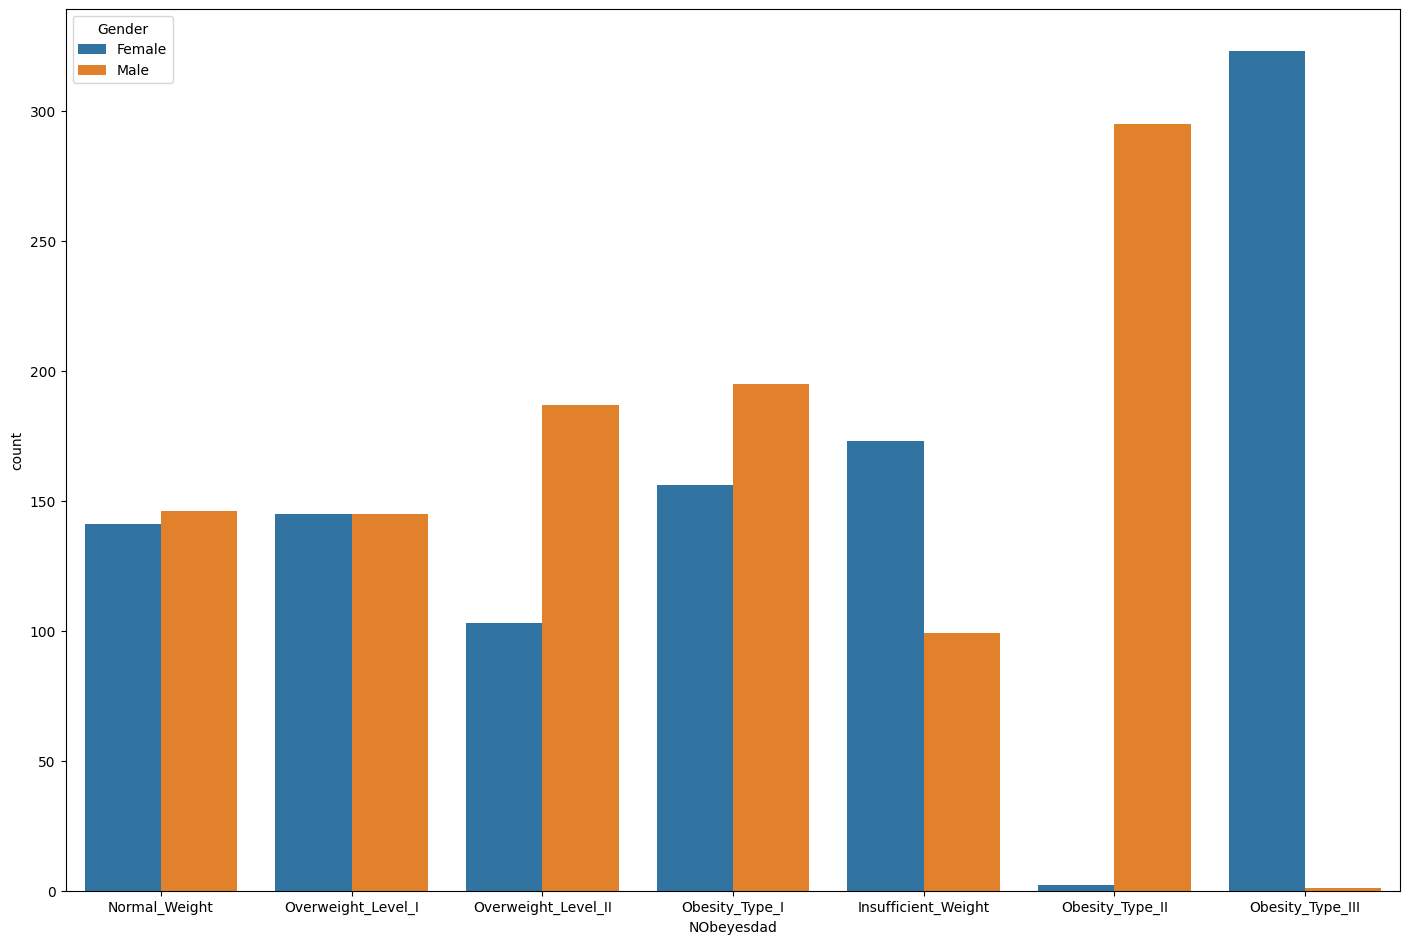

In [35]:
figure, ax = plt.subplots(1, 1)
figure.tight_layout(pad=1.0)
figure.set_size_inches(15, 10)
sns.countplot(data= categoricas, x= 'NObeyesdad', hue = 'Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='NObeyesdad', ylabel='count'>

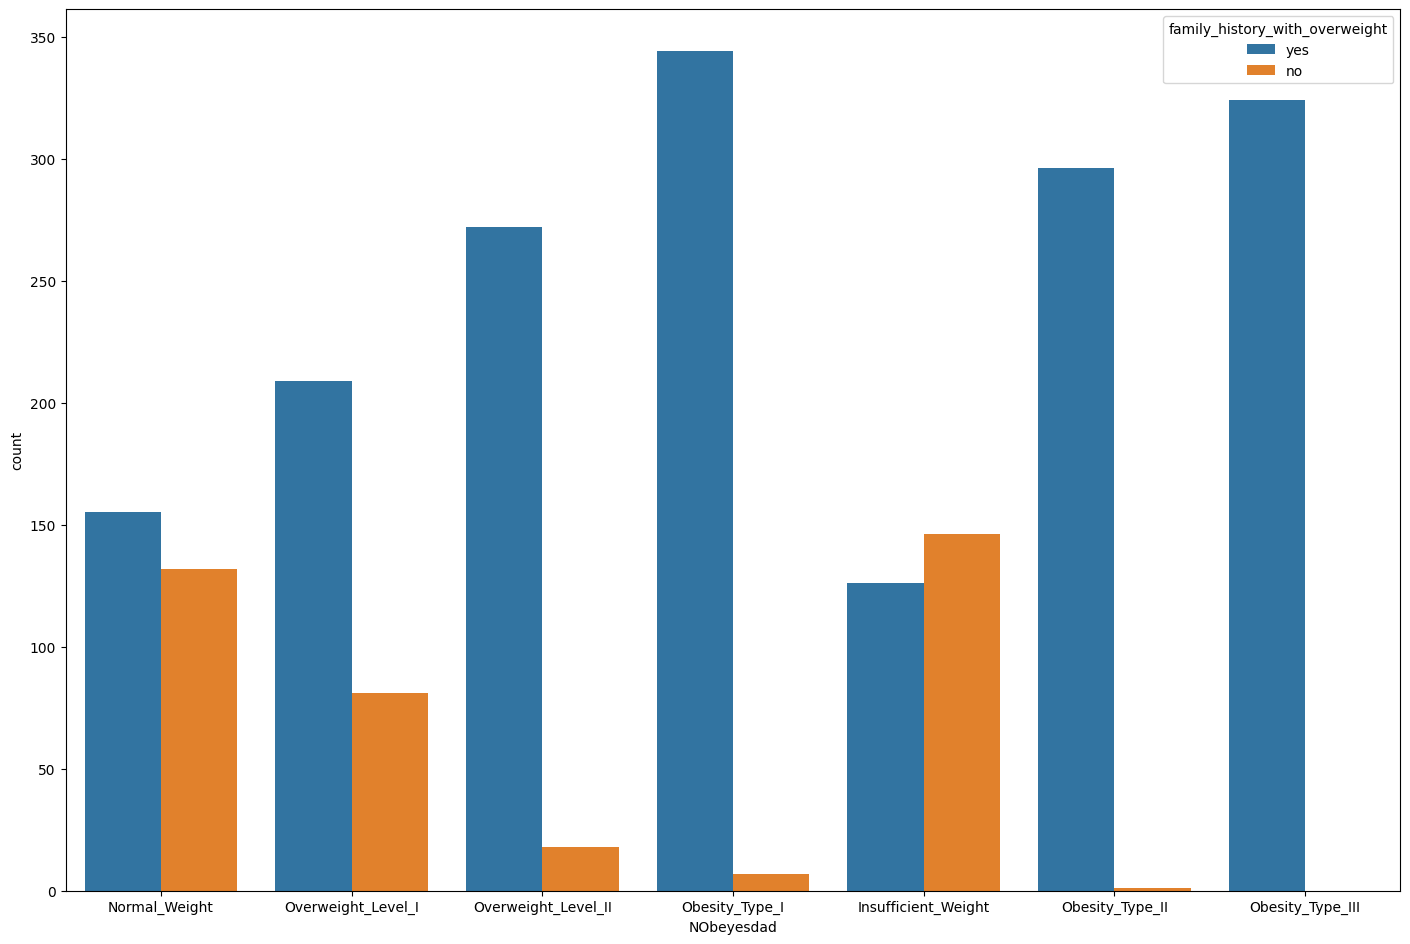

In [36]:
figure, ax = plt.subplots(1, 1)
figure.tight_layout(pad=1.0)
figure.set_size_inches(15, 10)
sns.countplot(data= categoricas, x= 'NObeyesdad', hue = 'family_history_with_overweight')

##**Hallazgos**

1. Las variables "Age", "Height" y "Weight" manejan diferentes escalas. Se recomienda aplicar normalización para evitar que la diferencia de escalas perjudique al modelo.

2. "Age" presenta un sesgo positivo (outliers), se aconseja aplicar una transformación para corregir el sesgo para mejorar el desempeño.
3. No se encontró alguna correlación signiicativa entre  "Age", "Height" y "Weight".
4. En la obesidad tipo 2 predominan principalmente hombres, mientras que en la tipo 3 predominan las mujeres.
5. En las clases con sobrepeso y obesidad predominan mayoritariamente aquellas personas con historial de sobrepeso en la familia.

#**División de los datos en conjuntos de entrenamiento, validación y prueba**

In [37]:
X = ObesityDataSet.drop('NObeyesdad', axis=1)
y = ObesityDataSet['NObeyesdad']
y_cod = LabelEncoder().fit_transform(y)

prueba = 0.2
validacion = 0.1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state= 1,
                                   test_size= prueba)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train ,
                                   random_state= 1,
                                   test_size= validacion)

#**Preprocesamiento**

In [38]:
numericas = X.select_dtypes(include=['int64', 'float64']).columns
numericas = numericas.drop(['Age'])
age = X[['Age']].columns
categoricas = X.select_dtypes(include=['object', 'category']).columns
categoricas = categoricas.drop(['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','CALC'])
ordinales = X[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','CALC']].columns

# Pipeline para características numéricas
pip_num = Pipeline(steps=[
    ('scaler', StandardScaler())  # Escalado de características
])

# Pipeline para aplicar transformación logarítmica
pip_log = Pipeline(steps=[
    ('log', FunctionTransformer(func=np.log)),  # Transformación logarítmica
    ('scaler', StandardScaler())  # Escalado de características
])

# Pipeline para las características categóricas no ordinales
pip_cat = Pipeline(steps=[
    ('binary', BinaryEncoder(handle_unknown='ignore'))  # Codificación Binaria
])

# Pipeline para las características categóricas ordinales
pip_ord = Pipeline(steps=[
    ('ordinary', OrdinalEncoder())  # Codificación Ordinal
])

# Combinar ambos pipelines en un ColumnTransformer
pipeline_preprocesada = ColumnTransformer(transformers=[
    ('log', pip_log, age),
    ('num', pip_num, numericas),
    ('cat', pip_cat, categoricas),
    ('ord', pip_ord, ordinales)
])

# Aplicar el pipeline de preprocesamiento a los datos
# Entrenamiento
X_train_pre= pipeline_preprocesada.fit_transform(X_train)
# Validación
X_val_pre = pipeline_preprocesada.transform(X_val)
# Prueba
X_test_pre = pipeline_preprocesada.transform(X_test)


#**Construcción, ajuste y evaluación de Modelos de Machine Learning**

In [42]:
# Definir los modelos y sus parámetros
modelos = {
    'Logistic Regression': {
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=1),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['lbfgs', 'saga']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=1),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': [1, 0.1, 0.01]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=1),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

def ajustar_y_evaluar_modelo(modelo, parametros, nombre_modelo):
    """
    Ajusta el modelo utilizando GridSearchCV y evalúa en el conjunto de validación.

    Args:
        modelo: Instancia del modelo de clasificación.
        parametros: Diccionario de hiperparámetros para GridSearchCV.
        nombre_modelo: Nombre del modelo (string).

    Returns:
        best_estimator: Mejor estimador encontrado por GridSearchCV.
    """
    print(f"Ajustando hiperparámetros para {nombre_modelo}...")
    grid_search = GridSearchCV(estimator=modelo, param_grid=parametros,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_pre, y_train)

    print(f"Mejores hiperparámetros para {nombre_modelo}: {grid_search.best_params_}")
    best_estimator = grid_search.best_estimator_

    # Predicciones en el conjunto de validación
    y_pred_val = best_estimator.predict(X_val_pre)

    # Evaluación
    accuracy = accuracy_score(y_val, y_pred_val)
    print(f"Accuracy en validación para {nombre_modelo}: {accuracy:.4f}")
    print(f"Matriz de Confusión para {nombre_modelo}:\n{confusion_matrix(y_val, y_pred_val)}")
    print(f"Reporte de Clasificación para {nombre_modelo}:\n{classification_report(y_val, y_pred_val)}\n")

    return best_estimator

# Diccionario para almacenar los mejores modelos
mejores_modelos = {}

for nombre, modelo_info in modelos.items():
    mejor_modelo = ajustar_y_evaluar_modelo(
        modelo=modelo_info['model'],
        parametros=modelo_info['params'],
        nombre_modelo=nombre
    )
    mejores_modelos[nombre] = mejor_modelo

# Evaluación final en el conjunto de prueba
print("Evaluación final en el conjunto de prueba:\n")

for nombre, modelo in mejores_modelos.items():
    y_pred_test = modelo.predict(X_test_pre)
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"--- {nombre} ---")
    print(f"Accuracy en test: {accuracy:.4f}")
    print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_test)}")
    print(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_test)}\n")

Ajustando hiperparámetros para Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores hiperparámetros para Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Accuracy en validación para Logistic Regression: 0.9763
Matriz de Confusión para Logistic Regression:
[[25  0  0  0  0  0  0]
 [ 1 34  0  0  0  0  0]
 [ 0  0 20  1  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0 32  0  0]
 [ 0  0  0  0  0 26  1]
 [ 0  0  0  0  0  1  9]]
Reporte de Clasificación para Logistic Regression:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        25
      Normal_Weight       1.00      0.97      0.99        35
     Obesity_Type_I       1.00      0.95      0.98        21
    Obesity_Type_II       0.95      1.00      0.97        19
   Obesity_Type_III       1.00      1.00      1.00        32
 Overweight_Level_I       0.96      0.96      0.96        27
Overweight_Level_II       0.90      0.90      0.90        10

           accuracy                           0.98       169
          macro avg       0.97      0.97      0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan 0.86965868 0.84134966 0.85649427        nan 0.85912802
 0.83080815 0.84990012        nan 0.85780789 0.8189617  0.84265459
        nan 0.85320262 0.81962176 0.83739144]
  warnings.warn(


Mejores hiperparámetros para K-Nearest Neighbors: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy en validación para K-Nearest Neighbors: 0.8225
Matriz de Confusión para K-Nearest Neighbors:
[[22  1  0  0  0  2  0]
 [ 7 20  1  1  0  5  1]
 [ 0  1 18  0  0  1  1]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0 32  0  0]
 [ 0  1  2  0  0 23  1]
 [ 0  1  3  1  0  0  5]]
Reporte de Clasificación para K-Nearest Neighbors:
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.88      0.81        25
      Normal_Weight       0.83      0.57      0.68        35
     Obesity_Type_I       0.75      0.86      0.80        21
    Obesity_Type_II       0.90      1.00      0.95        19
   Obesity_Type_III       1.00      1.00      1.00        32
 Overweight_Level_I       0.74      0.85      0.79        27
Overweight_Level_II       0.62      0.50      0.56        10

           accuracy                           0.82       169
          macro avg       0